# Lab 5 Multi-class Classification on FashionMNIST
You will 
- start doing image processing
- run our models on GPUs
- use the `DataLoader()` class to iterate over dataset
- visualise images in the dataset
- train the model in batches
- print training and test accuracies
- perform some transformations on the dataset
- tweak the hyper parameters to help with model performance

**IMPORTANT: Change your runtime type to GPU before continuining.**



In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

import torch.optim as optim
import torch.nn as nn

### 0. Set up the device and hyper parameters

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device) # should print cuda, change your runtime type to GPU if not

# Hyper parameters
input_size = 784 # 28x28
hidden_size = 32 # can be removed if you prefer to specify this in the model's class itself
num_classes = 10
num_epochs = 5 #5
batch_size = 32
learning_rate = 0.001

cuda


### 1. Load the dataset

In [ ]:
# import data
train_set = torchvision.datasets.FashionMNIST(root="./", download=True, 
                                              train=True,
                                              transform=transforms.Compose([transforms.ToTensor()]))

test_set = torchvision.datasets.FashionMNIST(root="./", download=False, 
                                              train=False,
                                              transform=transforms.Compose([transforms.ToTensor()]))

# TODO: after downloading, locate the data within your hosted runtime machine in the folder on the left
# Q0. Type 'OK' below if you see a folder called 'FashionMNIST'
# OK!!

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


### View basic info on training data

In [ ]:
print(f'Train set size: {len(train_set)}') # number of samples in training set 60000
print(f'Labels: {train_set.targets}') # displays targets labels for the training data 10
print(f'Count of each class: {train_set.targets.bincount()}') 

# Q1. Considering the size of the training set and the batch size, how many iterations will there be in each epoch?
  ## ANSWER: 60000/32 = 1875

# Q2. Is the dataset balanced? Why?
  ## ANSWER: The dataset seems perfectly balanced as each classes get same amount.

Train set size: 60000
Labels: tensor([9, 0, 0,  ..., 3, 0, 5])
Count of each class: tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])


### 2. Use DataLoader to load the datasets
If you get an error when you (re-)run the next code cell, then `restart the runtime` and run all code cells again.

In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size)

# Access the first data sample in the train_set using next(iter())
sample = next(iter(train_set))
print(f'Length: {len(sample)}')
print(f'Type: {type(sample)}')

# This means the data contains image-label pairs
# Unpack them
image, label = sample
# Same as these two lines:
# image = sample[0]
# label = sample[1]


print(image.shape)
print(label)

# Q3. What does the shape of the image tell you about the number of channels and dimensions of the images?
  ## ANSWER : The number of channel is 1 and the dimensions are 28*28.

# Q4. What does the label value represent?
  ## ANSWER : label value represents what kind of fashion item it is. That can be T-shirt / Trouser / Pullover / Dress / Coat / Sandal / Shirt / Sneaker / Bag / Ankel boot

Length: 2
Type: <class 'tuple'>
torch.Size([1, 28, 28])
9


### 3. Visualisation
View the first image

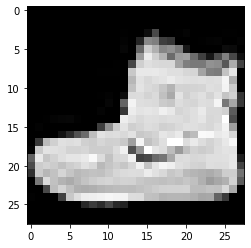

In [ ]:
plt.imshow(image.squeeze(), cmap='gray')

In [ ]:
# Get the first BATCH from train_loader
batch = next(iter(train_loader))
print(len(batch))
print(type(batch))

# Unpack the images and labels
images, labels = batch

print(f'Image shape: {images.shape}')
print(f'Label shape: {labels.shape}')

# Q5. What does each number in the shape of the images represent?
  ## ANSWER : 32 - there are 32 images in the batch / 1 - the number of channel is 1 / 28, 28 : an image consists of 28*28 pixels

# Q6. What about the shape of the labels?
  ## ANSWER : There are 32 labels for each image.

2
<class 'list'>
Image shape: torch.Size([32, 1, 28, 28])
Label shape: torch.Size([32])


### View some sample images
- The table for the label index and description is available [HERE](https://github.com/zalandoresearch/fashion-mnist#labels)

class labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8,
        4, 3, 0, 2, 4, 4, 5, 3])


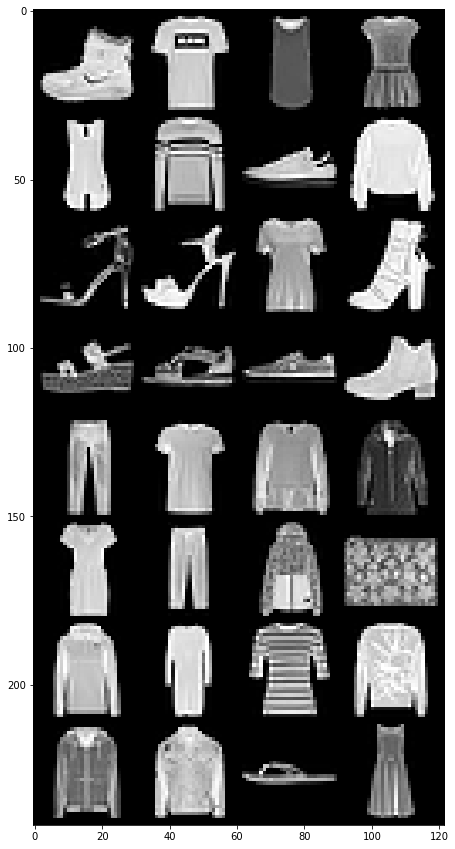

In [ ]:
# Create a grid 
plt.figure(figsize=(15,15))
grid = torchvision.utils.make_grid(tensor=images, nrow=4) # nrow = number of images displayed in each row

print(f"class labels: {labels}")

# Use grid.permute() to transpose the grid so that the axes meet the specifications required by 
# plt.imshow(), which are [height, width, channels]. PyTorch dimensions are [channels, height, width].
plt.imshow(grid.permute(1,2,0), cmap='gray')


# Note that the images are grayscale (black and white) and have 28x28 pixels
# Grayscale images only have one channel
# TODO: Check that the image labels for each image corresponds to the correct label provided above

# Q7. How many images are displayed in total here and why? 
  ## ANSWER : 32 images / As the batch size is 32

# Q8. How do you increase or decrease the TOTAL number of images displayed?
  ## ANSWER : It is possible by adjusting the batch size

### 4. Define the Neural Network, Loss and Optimiser

In [ ]:
# 4. NN model
class FashionNN(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super().__init__()
    self.layer1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.layer2 = nn.Linear(hidden_size, num_classes)
    # NOTE: softmax not added here because of CrossEntropyLoss later

  def forward(self, x):
    out = self.layer1(x)
    out = self.relu(out)
    out = self.layer2(out)
    return out

# 4.1 Create NN model instance
model = FashionNN(input_size, hidden_size, num_classes).to(device)

# 4.2 Loss and Optimiser
criterion = nn.CrossEntropyLoss() # will apply softmax
opt = optim.Adam(model.parameters(), lr=learning_rate)

### 5. Training Loop

In [ ]:
# 5. Training loop
n_total_steps = len(train_set)
n_iterations = -(-n_total_steps // batch_size) # ceiling division

n_correct = 0
n_samples = 0

for epoch in range(num_epochs):
  print('\n')
  # 5.1 loop over all the batches, i is index, (images, labels) is data
  for i, (images, labels) in enumerate(train_loader):
    # 5.2 Reshape images first [batch_size, 1, 28, 28] --> [batch_size, 784]
    # 5.3 Push images to GPU
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    # 5.4 Forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # 5.5 Backward pass
    opt.zero_grad() # 5.6 Empty the values in the gradient attribute, or model.zero_grad()
    loss.backward() # 5.7 Backprop
    opt.step() # 5.8 Update params

    # 5.9 Print loss
    if (i+1) % 200 == 0:
      print(f'Epoch {epoch+1}/{num_epochs}, Iteration {i+1}/{n_iterations}, Loss={loss.item():.4f} ')

    # 5.10 Get Accuracy
    # torch.max() returns actual probability value (ignored) and index or class label (selected)
    _, y_preds = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (y_preds == labels).sum().item()

# 5.11 Print accuracy
acc = 100.0 * n_correct / n_samples
print(f'\nTrain Accuracy = {acc:.4f}')



Epoch 1/5, Iteration 200/1875, Loss=0.7098 
Epoch 1/5, Iteration 400/1875, Loss=0.5279 
Epoch 1/5, Iteration 600/1875, Loss=0.4319 
Epoch 1/5, Iteration 800/1875, Loss=0.6901 
Epoch 1/5, Iteration 1000/1875, Loss=0.3268 
Epoch 1/5, Iteration 1200/1875, Loss=0.3100 
Epoch 1/5, Iteration 1400/1875, Loss=0.8092 
Epoch 1/5, Iteration 1600/1875, Loss=0.4521 
Epoch 1/5, Iteration 1800/1875, Loss=0.4144 


Epoch 2/5, Iteration 200/1875, Loss=0.4737 
Epoch 2/5, Iteration 400/1875, Loss=0.3923 
Epoch 2/5, Iteration 600/1875, Loss=0.3724 
Epoch 2/5, Iteration 800/1875, Loss=0.5584 
Epoch 2/5, Iteration 1000/1875, Loss=0.2575 
Epoch 2/5, Iteration 1200/1875, Loss=0.2017 
Epoch 2/5, Iteration 1400/1875, Loss=0.7347 
Epoch 2/5, Iteration 1600/1875, Loss=0.3205 
Epoch 2/5, Iteration 1800/1875, Loss=0.4016 


Epoch 3/5, Iteration 200/1875, Loss=0.3962 
Epoch 3/5, Iteration 400/1875, Loss=0.3396 
Epoch 3/5, Iteration 600/1875, Loss=0.3641 
Epoch 3/5, Iteration 800/1875, Loss=0.5620 
Epoch 3/5, Itera

### 6. Evaluation

In [ ]:
# 6. Deactivate the autograd engine to reduce memory usage and speed up computations (backprop disabled).
with torch.no_grad():
  n_correct = 0
  n_samples = 0

  # 6.1 Loop through test set
  for images, labels in test_loader:
    # 6.2 0
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    # 6.3 Run on trained model
    outputs = model(images) 

    # 6.4. Get predictions
    # torch.max() returns actual probability value (ignored) and index or class label (selected)
    _, y_preds = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (y_preds == labels).sum().item()

  # 6.5 Print accuracy
  acc = 100.0 * n_correct / n_samples
  print(f'Test Accuracy = {acc:.4f}')

Test Accuracy = 86.0800


In [ ]:
# Q9. What is the final loss of this model on the training set?
  ## ANSWER : 0.3018

# Q10. What is the accuracy of this model on the training set?
  ## ANSWER : 82.6842

# Q11. What is the accuracy of the trained model on the test set?
  ## ANSWER : 83.7300

### TASK: Increase `num_epochs` & redo
- Keep track of the loss and test set accuracy
- Set `num_epochs=5` in code cell 0 (hyper parameters)
- Rebuild and retrain the model by **running code cells 0, 4, and 5 ONLY**
- Evaluate the model on the test data by running **code cell 6**
- Answer the questions below

In [ ]:
# Q12. What is the final loss now and is it less than the previous loss?
  ## ANSWER: 0.3403 / It is more than the previous loss

# Q13. Are the training and test set accuracies higher now?
  ## YES / accuracies are both higher than the previous one

# Q14. After changing the num_epochs, why should code cell 4 (NN, Loss, Optimiser) be run before code cell 5 (training)?
  ## Because the "model" contains parameters and results of the previous model. So we have to refresh it in order to make another model.

## 6. Let's add some improvements

We are going to add ONE improvement at a time
- First the training data is **normalised and shuffled** (code provided). Use the same number of epochs as the the previous case to make a fair comparison.
- Build and train the model and get the loss, train and test set accuracies.
- Then change ONE hyper parameter, e.g. `num_epochs`, `hidden_size`, `batch_size`, `learning_rate` OR add layers.
- Run code cells 7-11 to train and test the model and take note of its loss, train and test accuracies.

**IMPORTANT!** If you have trouble running any of the code cells below, restart the runtime, via `Runtime-->Restart runtime` before continuing (or `Ctrl/Cmd + M + .`)


In [ ]:
# You DO NOT have to run this cell code unless you restarted the runtime.

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

import torch.optim as optim
import torch.nn as nn

### 7. Normalise and Shuffle the Traning Data

In [ ]:
# Add Normalisation to transform data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.0,), (0.5,),)])

train_set = torchvision.datasets.FashionMNIST(root="./", download=True, 
                                              train=True,
                                              transform=transform)
test_set = torchvision.datasets.FashionMNIST(root="./", download=True, 
                                              train=False,
                                              transform=transform)


### 8a. Hyper-parameters

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# Hyper parameters
input_size = 784 # 28x28
hidden_size = 128
num_classes = 10 
num_epochs = 10
batch_size = 32
learning_rate = 0.001

cuda


### 8b. Shuffle the training data

This reshuffles the data at every epoch


In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)


### 9. NN Model, Loss, Optimiser

In [ ]:
# 9. NN model
class FashionNN2(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super().__init__()
    self.layer1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.layer2 = nn.Linear(hidden_size, 32)
    self.layer3 = nn.Linear(32, num_classes)
    # NOTE: softmax not added here because of CrossEntropyLoss later

  def forward(self, x):
    out = self.layer1(x)
    out = self.relu(out)
    out = self.layer2(out)
    out = self.relu(out)
    out = self.layer3(out)
    return out

# 9.1 Create NN model instance
model = FashionNN2(input_size, hidden_size, num_classes).to(device)

# 9.2 Loss and Optimiser
criterion = nn.CrossEntropyLoss() # will apply softmax
opt = optim.Adam(model.parameters(), lr=learning_rate)

### 10. Training Loop

In [ ]:
# 10. Training loop
n_total_steps = len(train_set)
n_iterations = -(-n_total_steps // batch_size) # ceiling division

n_correct = 0
n_samples = 0

for epoch in range(num_epochs):
  print('\n')
  # 10.1 loop over all the batches, i is index, (images, labels) is data
  for i, (images, labels) in enumerate(train_loader):
    # 10.2 Reshape images first [batch_size, 1, 28, 28] --> [batch_size, 784]
    # 10.3 Push images to GPU
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    # 10.4 Forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # 10.5 Backward pass
    opt.zero_grad() 
    loss.backward() 
    opt.step() 

    # 10.6 Print loss
    if (i+1) % 200 == 0:
      print(f'Epoch {epoch+1}/{num_epochs}, Iteration {i+1}/{n_iterations}, Loss={loss.item():.4f} ')

    # 10.7 Get model Accuracy
    # torch.max() returns actual probability value (ignored) and index of class label (selected)
    _, y_preds = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (y_preds == labels).sum().item()

# 10.8 Print accuracy
acc = 100.0 * n_correct / n_samples
print(f'Finished training \nTrain Accuracy = {acc:.4f}')




Epoch 1/10, Iteration 200/1875, Loss=0.7492 
Epoch 1/10, Iteration 400/1875, Loss=0.5174 
Epoch 1/10, Iteration 600/1875, Loss=0.5240 
Epoch 1/10, Iteration 800/1875, Loss=0.3046 
Epoch 1/10, Iteration 1000/1875, Loss=0.5334 
Epoch 1/10, Iteration 1200/1875, Loss=0.3833 
Epoch 1/10, Iteration 1400/1875, Loss=0.6227 
Epoch 1/10, Iteration 1600/1875, Loss=0.6400 
Epoch 1/10, Iteration 1800/1875, Loss=0.3058 


Epoch 2/10, Iteration 200/1875, Loss=0.4198 
Epoch 2/10, Iteration 400/1875, Loss=0.2854 
Epoch 2/10, Iteration 600/1875, Loss=0.4448 
Epoch 2/10, Iteration 800/1875, Loss=0.4668 
Epoch 2/10, Iteration 1000/1875, Loss=0.3642 
Epoch 2/10, Iteration 1200/1875, Loss=0.2993 
Epoch 2/10, Iteration 1400/1875, Loss=0.6645 
Epoch 2/10, Iteration 1600/1875, Loss=0.4463 
Epoch 2/10, Iteration 1800/1875, Loss=0.2599 


Epoch 3/10, Iteration 200/1875, Loss=0.2252 
Epoch 3/10, Iteration 400/1875, Loss=0.4819 
Epoch 3/10, Iteration 600/1875, Loss=0.2255 
Epoch 3/10, Iteration 800/1875, Loss=0.

### 11. Evaluation on Test Set

In [ ]:
# 11. Deactivate the autograd engine to reduce memory usage and speed up computations (backprop disabled).
with torch.no_grad():
  n_correct = 0
  n_samples = 0

  # 11.1 Loop through test set
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images) 

    # 11.2 Get predictions
    # torch.max() returns actual probability value (ignored) and index or class label (selected)
    _, y_preds = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (y_preds == labels).sum().item()

  # 11.3 Print accuracy
  acc = 100.0 * n_correct / n_samples
  print(f'Test Accuracy = {acc:.4f}')


Test Accuracy = 88.1100


In [ ]:
# Q15. What is the final loss of this model on the training set?
  ## ANSWER : 0.2197

# Q16. What is the accuracy of this model on the training set?
  ## ANSWER : 83.3725

# Q17. What is the accuracy of the trained model on the test set?
  ## ANSWER : 84.6700

# Q18. Did shuffling and normalisation help to build a better model?
  ## ANSWER : The loss is decreased, and the accuracies of train/test were higher than the previous one(All hyperparameters were same but not shuffled and not normalized) not doing so.

# Q19. How many training samples were seen by the model during each epoch of training?
  ## ANSWER : 9 training samples were seen

### Further Improvement

- Try changing other hyper parameters, ONE at a time while keeping everything else the same
- **KEEP shuffling and normalisation**, i.e. do not change code cells 7 and 8b.
- Example changes:
  - Increase `num_epochs` (max 20)
  - Change number neurons in hidden layers (keep it within 128 max per layer)
  - Add ONE extra hidden layer at a time (start with 32 units). You only need to run code cells 9-11.
  - Change `batch_size` (to powers of 2s), try 64.
  - Change loss to NLLLoss(), you need to add softmax activation in the output layer
  - Change the learning rate

- Rerun **code cells 8a-11**(except when adding layers, where you would rerun just cells 9-11).
- If the change improves the model, KEEP this improvement and change something else and redo to see if it can be further improved.
- Keep a record of the final loss, train and test set accuracies for each test run.
- Make at LEAST THREE changes that help improve the model's performance on the test set.


In [ ]:
# Test 1 
# Change (e.g. num_epochs=10): num_epochs=10
# Loss: 0.1843
# Train acc: 89.7415
# Test acc: 86.6600

In [ ]:
# Test 2 
# Change (e.g. batch_size=64): Added one hidden layer
# Loss: 0.4372
# Train acc: 87.2048
# Test acc: 87.0200

In [ ]:
# Test 3
# Change: hidden_size=128
# Loss: 0.2333
# Train acc: 88.1963
# Test acc: 88.1100

In [ ]:
# Q20. State any insights you gained from this exercise.
  ## The loss and the accuracy has low correlation.
  ## Making a complex model can helpful for training performance, however that does not guarantee the test performance.
  ## Loss and accuracy varies for each runs. They are not always come to the similar results.
  ## Normalization can help increase the performance.